In [1]:
# imports
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [2]:
%load_ext lab_black

In [3]:
cell_type_color_dict = {
    "B cell": "#88CCEE",
    "CD14+ monocyte": "#CC6677",
    "CD4+ T cell": "#DDCC77",
    "Cytotoxic T cell": "#117733",
    "Dendritic cell": "#332288",
    "Natural killer cell": "#AA4499",
    "CD16+ monocyte": "#44AA99",
}

In [4]:
alias_dict = {
    "B cell": "0",
    "CD14+ monocyte": "1",
    "CD16+ monocyte": "2",
    "CD4+ T cell": "3",
    "Cytotoxic T cell": "4",
    "Dendritic cell": "5",
    "Natural killer cell": "6",
}
alias_dict2 = {
    "B cell": "7",
    "CD14+ monocyte": "8",
    "CD16+ monocyte": "9",
    "CD4+ T cell": "10",
    "Cytotoxic T cell": "11",
    "Dendritic cell": "12",
    "Natural killer cell": "13",
}

In [5]:
alias_dict_inv = {
    "0": "B cell",
    "1": "CD14+ monocyte",
    "2": "CD16+ monocyte",
    "3": "CD4+ T cell",
    "4": "Cytotoxic T cell",
    "5": "Dendritic cell",
    "6": "Natural killer cell",
    "7": "B cell",
    "8": "CD14+ monocyte",
    "9": "CD16+ monocyte",
    "10": "CD4+ T cell",
    "11": "Cytotoxic T cell",
    "12": "Dendritic cell",
    "13": "Natural killer cell",
}

In [6]:
df = pd.read_csv(
    "cistopic_objects/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus__cell_data.pkl",
    sep=",",
)
df["one"] = 1

In [9]:
df

,Unnamed: 0,cisTopic_log_nr_frag,cisTopic_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_acc,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,...,centre_tech,Log_unique_nr_frag_in_regions,consensus_cell_type_individual,seurat_cell_type_pred_score,cell_type__mega,seurat_cell_type_pred_score__mega,consensus_cell_type__mega,seurat_cell_type__mega,seurat_cell_type__individual,one
0,TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXE...,3.436481,2732,3.321598,2097,4.540492,4.520903,34713,33182,1531,...,OHS_s3atac,7.627057,B cell,0.724987,Cytotoxic T cell,0.417394,Cytotoxic T cell,Cytotoxic T cell,Cytotoxic T cell,1
1,ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXE...,3.295567,1975,2.938520,868,4.001474,3.981003,10034,9572,462,...,OHS_s3atac,7.431892,CD4+ T cell,0.376578,B cell,0.342953,Cytotoxic T cell,B cell,B cell,1
2,GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXE...,3.398287,2502,3.242541,1748,4.226136,4.202870,16832,15954,878,...,OHS_s3atac,7.489971,CD4+ T cell,0.531326,Cytotoxic T cell,0.391198,Cytotoxic T cell,Cytotoxic T cell,Cytotoxic T cell,1
3,CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXE...,3.845284,7003,3.750431,5629,4.480108,4.457746,30207,28691,1516,...,OHS_s3atac,8.672828,NaN,NaN,B cell,0.327305,Cytotoxic T cell,B cell,NaN,1
4,ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXE...,3.206286,1608,3.068928,1172,3.818688,3.796227,6587,6255,332,...,OHS_s3atac,7.195937,Cytotoxic T cell,0.441366,Cytotoxic T cell,0.375826,Cytotoxic T cell,Cytotoxic T cell,Natural killer cell,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169222,TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS,3.738543,5477,3.263873,1836,4.283573,4.080951,19212,12049,7163,...,MDC_mtscatac,7.414573,CD4+ T cell,0.309143,Cytotoxic T cell,0.388897,Cytotoxic T cell,Cytotoxic T cell,CD4+ T cell,1
169223,CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS,3.416308,2608,2.569374,371,3.753353,3.514415,5667,3269,2398,...,MDC_mtscatac,6.028279,CD4+ T cell,0.402943,Cytotoxic T cell,0.432030,CD4+ T cell,Cytotoxic T cell,CD4+ T cell,1
169224,GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS,3.260310,1821,3.084934,1216,3.563006,3.408410,3656,2561,1095,...,MDC_mtscatac,7.017506,Cytotoxic T cell,0.450904,Cytotoxic T cell,0.412242,Cytotoxic T cell,Cytotoxic T cell,Cytotoxic T cell,1
169225,CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS,3.425371,2663,2.921686,835,4.046729,3.840984,11136,6934,4202,...,MDC_mtscatac,6.751101,Cytotoxic T cell,0.334340,Cytotoxic T cell,0.395910,Cytotoxic T cell,Cytotoxic T cell,Cytotoxic T cell,1


In [10]:
df["tech"].value_counts() / 169227

ddseq          0.209074
10xv2          0.203260
10xv11         0.139534
mtscatac       0.135953
hydrop         0.127840
10xmultiome    0.094607
10xv1          0.061184
s3atac         0.028547
Name: tech, dtype: float64

# individual consensus cell type vs mega consensus cell type

In [349]:
df["consensus_cell_type__mega"].value_counts()

CD4+ T cell            49336
Cytotoxic T cell       49303
CD14+ monocyte         38490
B cell                 15339
Natural killer cell     9733
CD16+ monocyte          4402
Dendritic cell          2624
Name: consensus_cell_type__mega, dtype: int64

In [352]:
contrasts = [
    ["consensus_cell_type_individual", "consensus_cell_type__mega"],
    ["seurat_cell_type__mega", "consensus_cell_type__mega"],
    ["seurat_cell_type__individual", "seurat_cell_type__mega"],
]

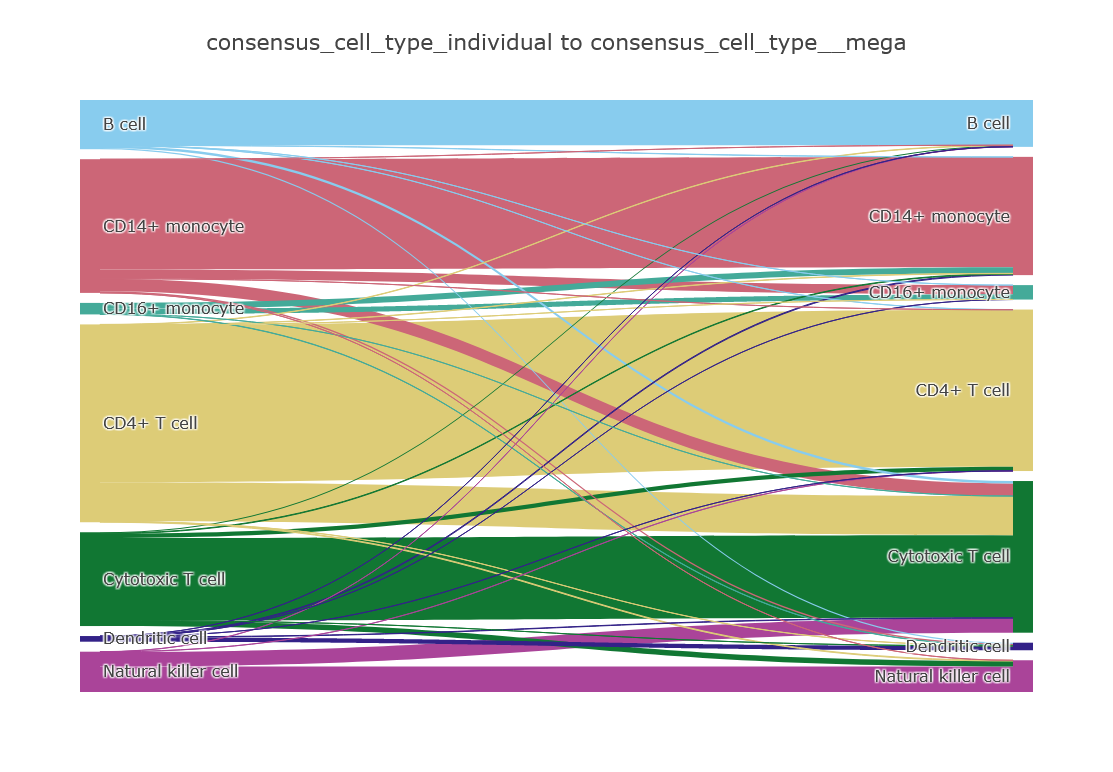

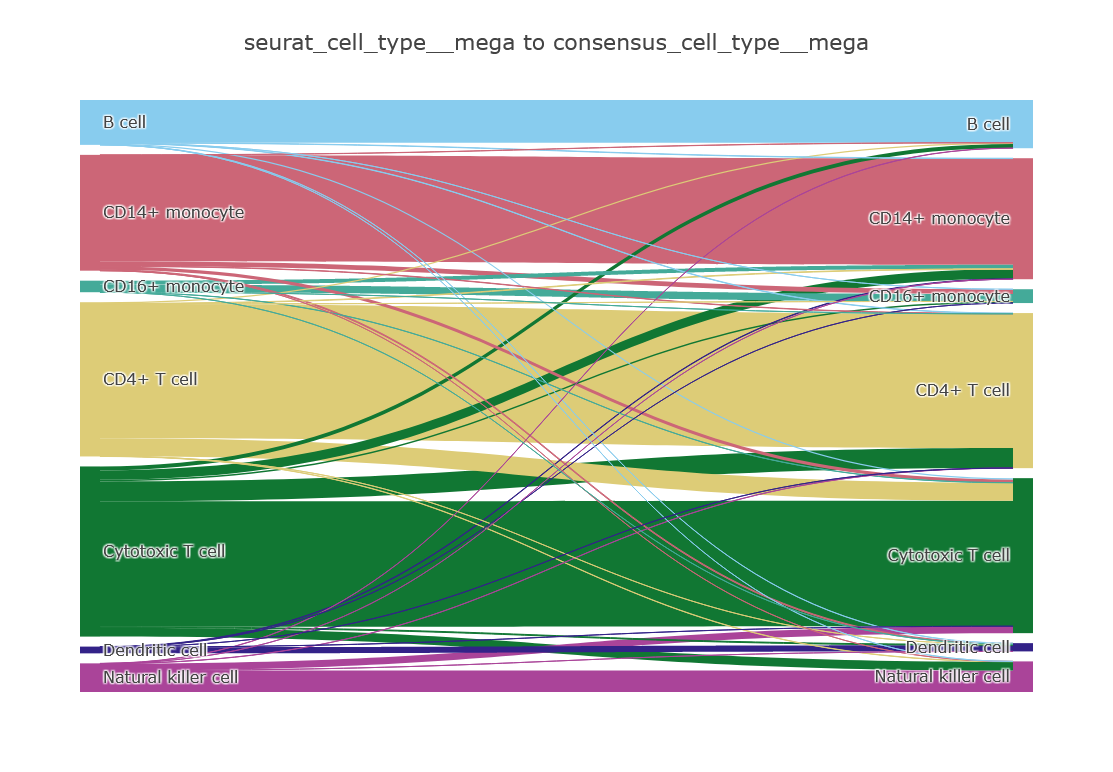

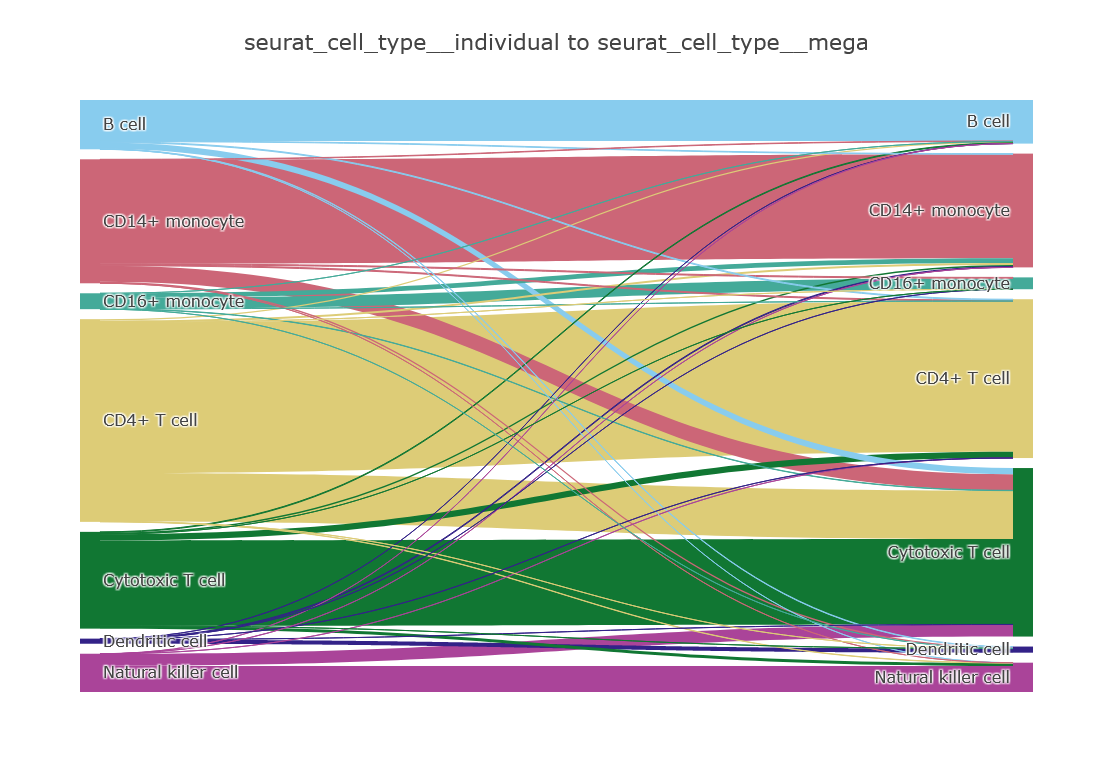

In [353]:
for contrast in contrasts:
    df_counts = df.groupby(contrast, as_index=False)["one"].sum()

    df_counts.columns = ["Source", "Target", "Value"]
    df_counts["Link Color"] = [cell_type_color_dict[x] for x in df_counts["Source"]]
    df_counts["Source"] = [alias_dict[x] for x in df_counts["Source"]]
    df_counts["Target"] = [alias_dict2[x] for x in df_counts["Target"]]
    df_counts = df_counts.sort_values(["Value"], ascending=False).reset_index(drop=True)

    # df_counts = df_counts.reset_index(drop=True)

    df_nodes = pd.DataFrame([str(x) for x in range(0, 14)], columns=["ID"])
    df_nodes["Label"] = [alias_dict_inv[x] for x in df_nodes["ID"]]
    df_nodes["Color"] = [cell_type_color_dict[x] for x in df_nodes["Label"]]
    # df_nodes = df_nodes.reset_index(drop=True)
    # df_nodes.index = list(df_nodes["ID"])

    # Sankey plot setup
    data_trace = dict(
        type="sankey",
        domain=dict(x=[0, 1], y=[0, 1]),
        orientation="h",
        valueformat=".0f",
        node=dict(
            pad=10,
            # thickness = 30,
            line=dict(color="black", width=0),
            label=df_nodes["Label"].dropna(axis=0, how="any"),
            color=df_nodes["Color"],
        ),
        link=dict(
            source=df_counts["Source"].dropna(axis=0, how="any"),
            target=df_counts["Target"].dropna(axis=0, how="any"),
            value=df_counts["Value"].dropna(axis=0, how="any"),
            color=df_counts["Link Color"].dropna(axis=0, how="any"),
        ),
    )

    layout = dict(
        title=f"{contrast[0]} to {contrast[1]}",
        height=772,
        font=dict(size=16),
    )

    fig = dict(data=[data_trace], layout=layout)
    iplot(fig, validate=False)

# individual seurat vs mega seurat

# try this now for individual samples

In [357]:
contrasts = [
    ["seurat_cell_type__individual", "seurat_cell_type__mega"],
]

In [363]:
contrasts = [
    ["consensus_cell_type_individual", "consensus_cell_type__mega"],
]

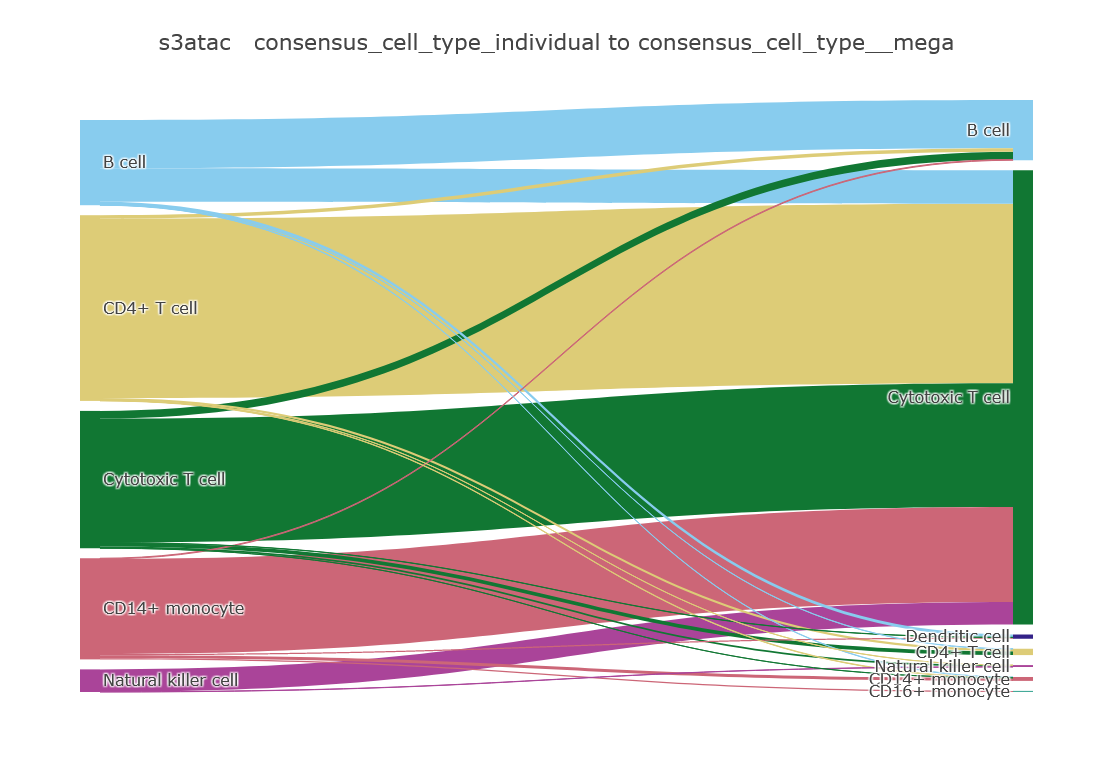

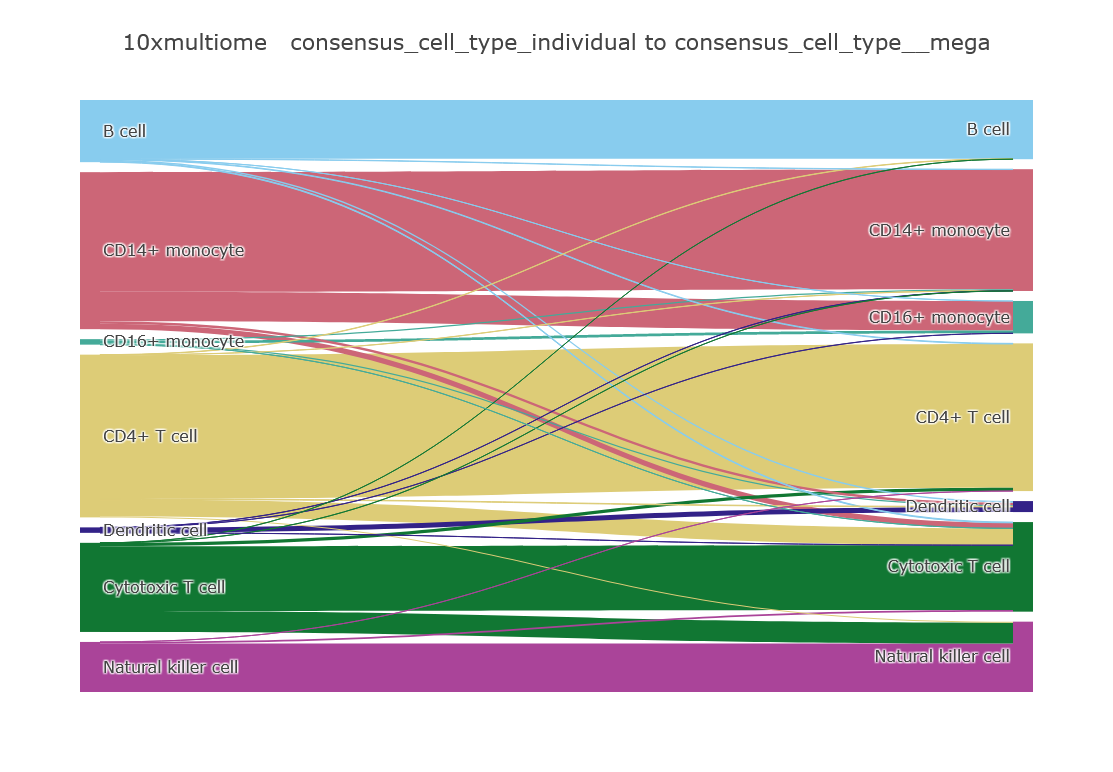

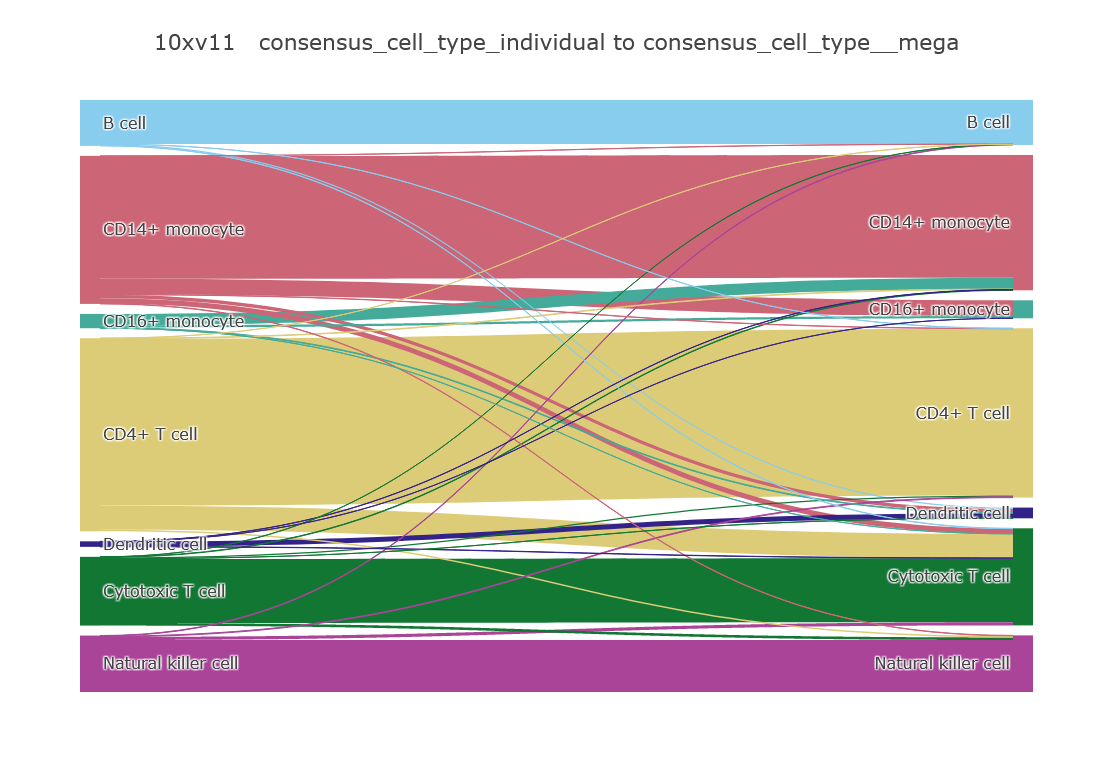

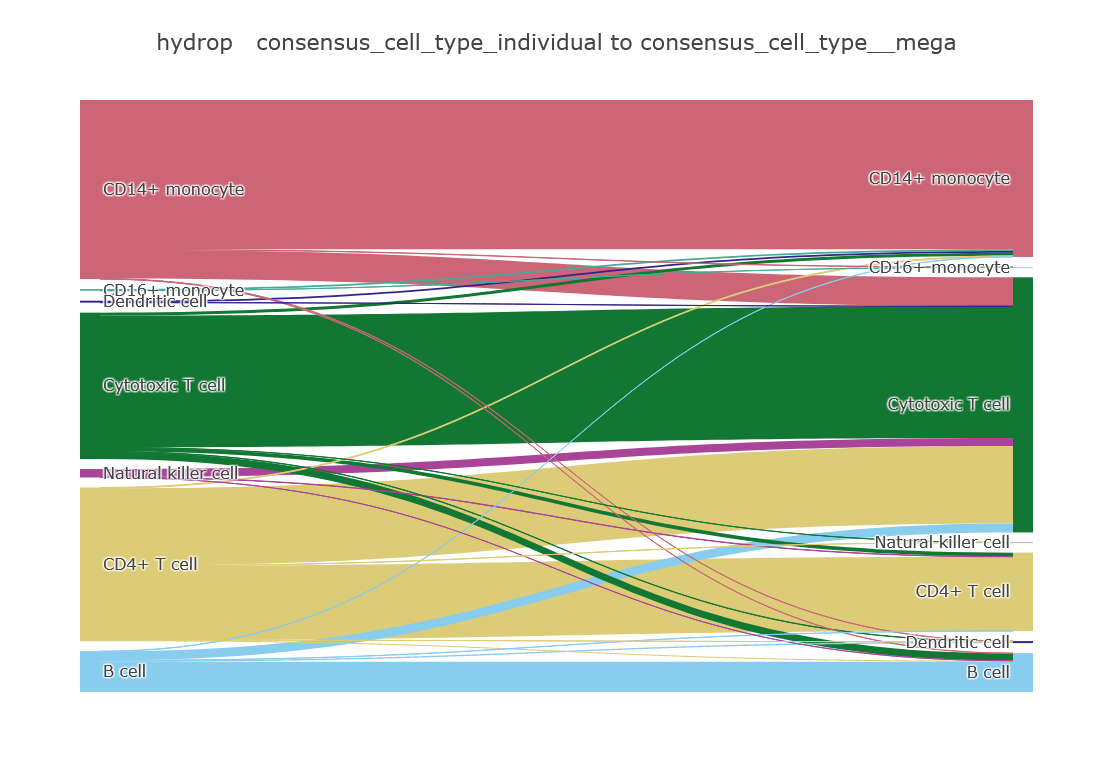

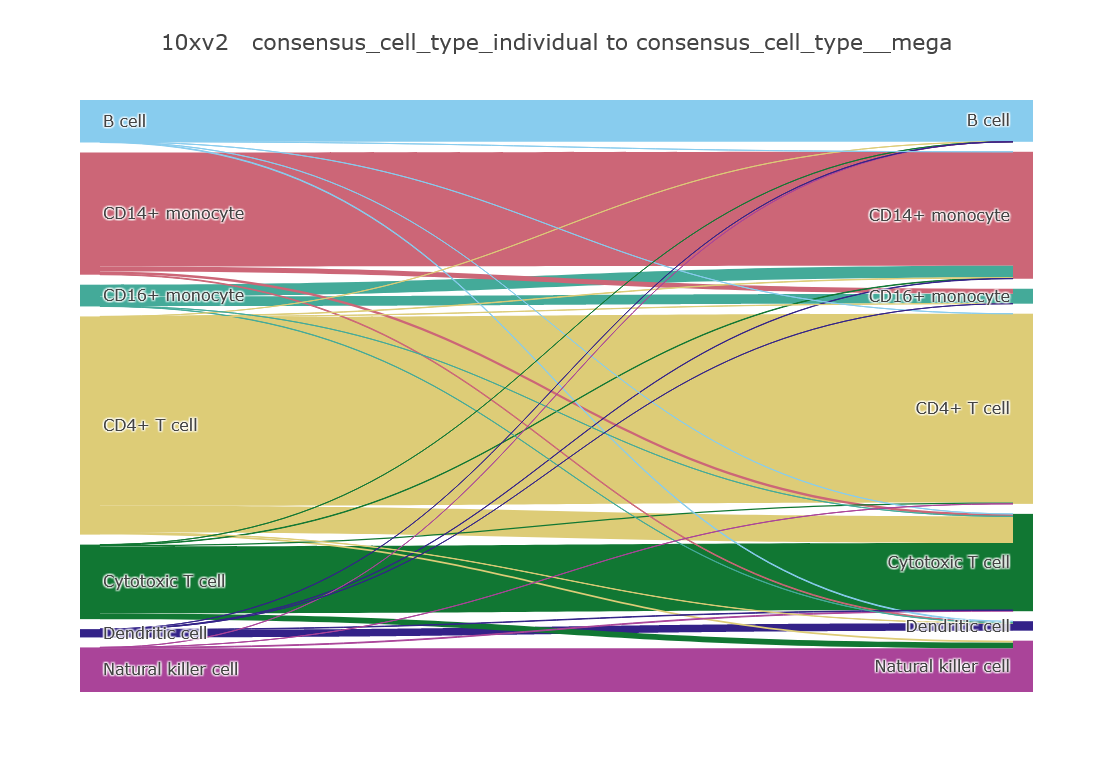

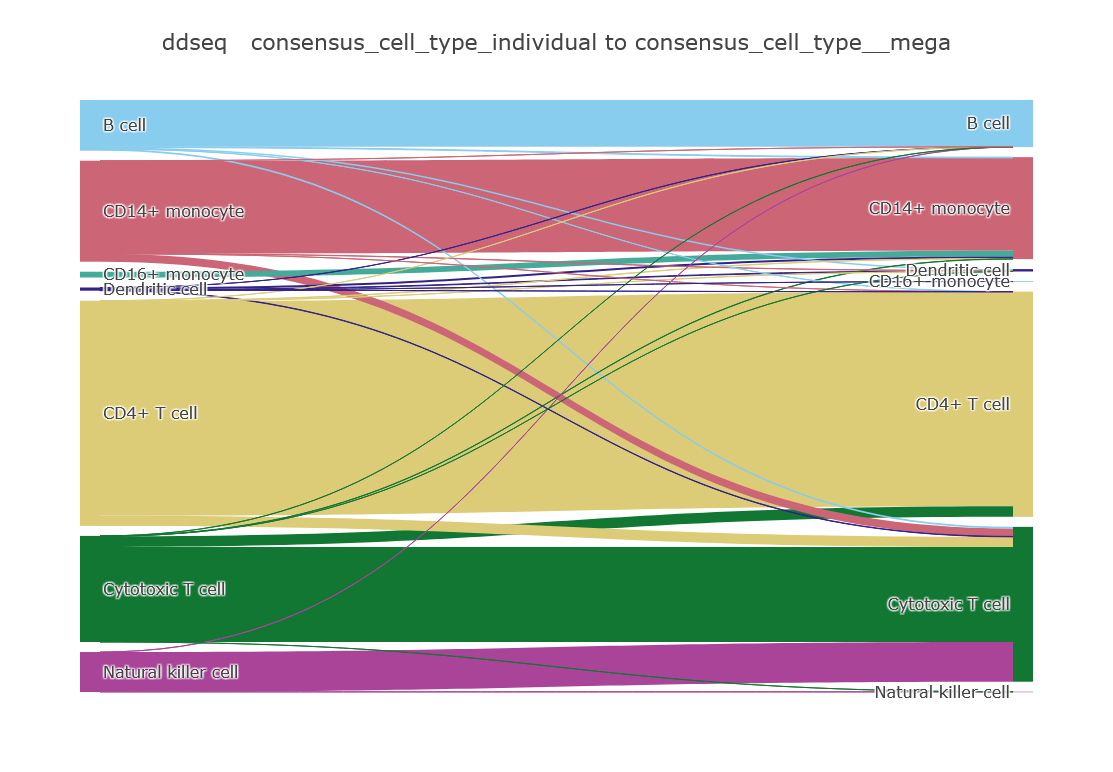

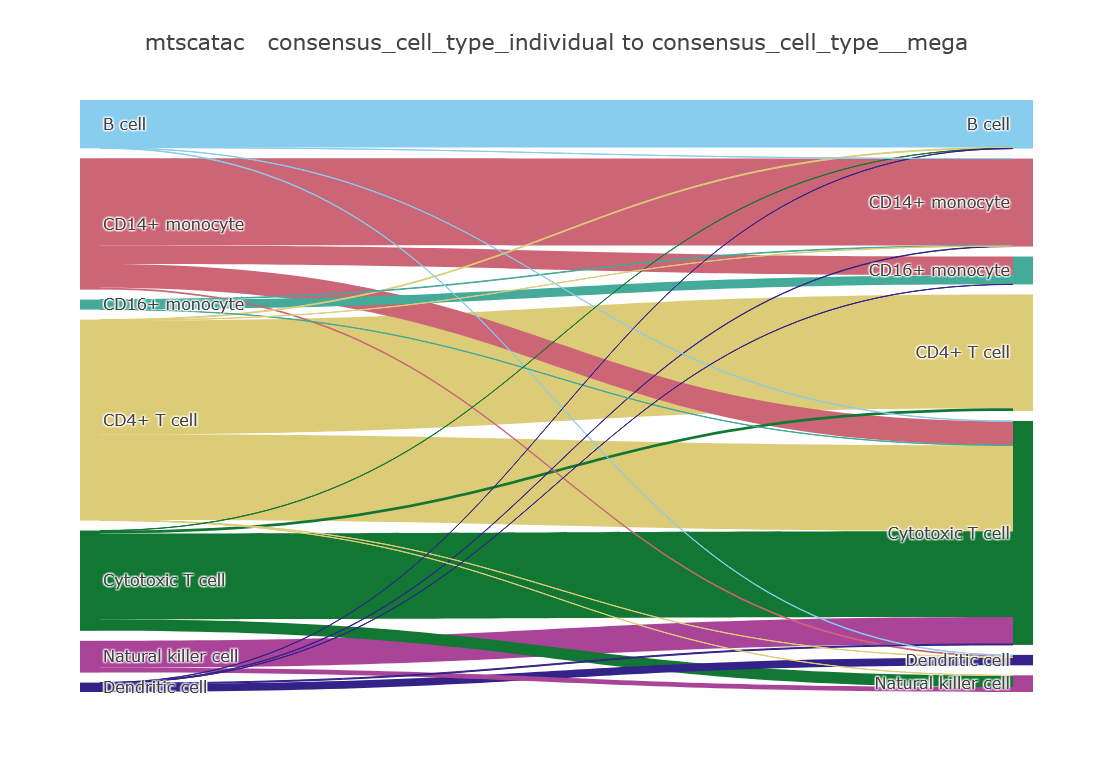

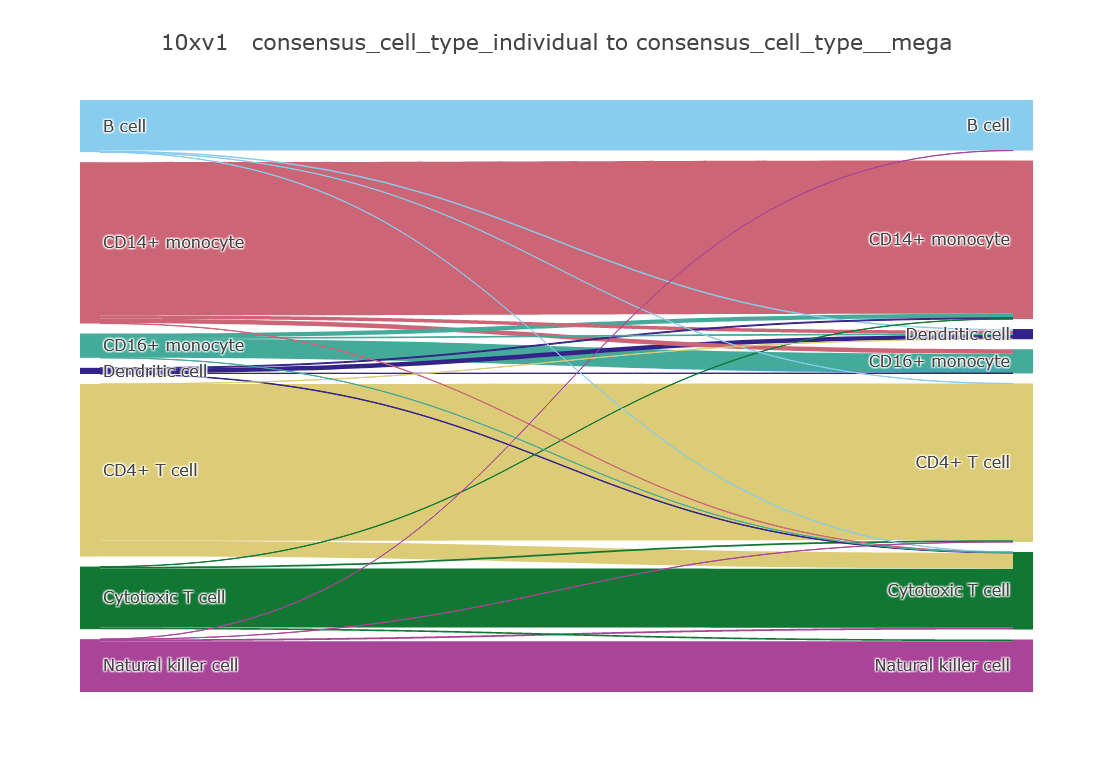

In [364]:
for tech in df["tech"].unique():
    df_tmp = df[df["tech"] == tech]
    for contrast in contrasts:
        df_counts = df_tmp.groupby(contrast, as_index=False)["one"].sum()

        df_counts.columns = ["Source", "Target", "Value"]
        df_counts["Link Color"] = [cell_type_color_dict[x] for x in df_counts["Source"]]
        df_counts["Source"] = [alias_dict[x] for x in df_counts["Source"]]
        df_counts["Target"] = [alias_dict2[x] for x in df_counts["Target"]]
        df_counts = df_counts.sort_values(["Value"], ascending=False).reset_index(
            drop=True
        )

        # df_counts = df_counts.reset_index(drop=True)

        df_nodes = pd.DataFrame([str(x) for x in range(0, 14)], columns=["ID"])
        df_nodes["Label"] = [alias_dict_inv[x] for x in df_nodes["ID"]]
        df_nodes["Color"] = [cell_type_color_dict[x] for x in df_nodes["Label"]]
        # df_nodes = df_nodes.reset_index(drop=True)
        # df_nodes.index = list(df_nodes["ID"])

        # Sankey plot setup
        data_trace = dict(
            type="sankey",
            domain=dict(x=[0, 1], y=[0, 1]),
            orientation="h",
            valueformat=".0f",
            node=dict(
                pad=10,
                # thickness = 30,
                line=dict(color="black", width=0),
                label=df_nodes["Label"].dropna(axis=0, how="any"),
                color=df_nodes["Color"],
            ),
            link=dict(
                source=df_counts["Source"].dropna(axis=0, how="any"),
                target=df_counts["Target"].dropna(axis=0, how="any"),
                value=df_counts["Value"].dropna(axis=0, how="any"),
                color=df_counts["Link Color"].dropna(axis=0, how="any"),
            ),
        )

        layout = dict(
            title=f"{tech} \n {contrast[0]} to {contrast[1]}",
            height=772,
            font=dict(size=16),
        )

        fig = dict(data=[data_trace], layout=layout)
        iplot(fig, validate=False)